In [1]:
from sklearn import datasets
boston = datasets.load_boston()

In [2]:
X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("TRAIN - ", len(train_index))
    print("TEST - ",  len(test_index))

TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  455
TEST -  51
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50
TRAIN -  456
TEST -  50


In [4]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse) / 10, sum(ridge_mse) / 10

(34.46408458830233, 34.078246209259284)

In [5]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830233, -34.078246209259284)

In [6]:
# 잘 안쓸거임
from sklearn.model_selection import cross_validate
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

scoring = ['neg_mean_squared_error', 'r2']

lasso_scores = cross_validate(lasso_regressor, X, y, cv=10, scoring=scoring)
ridge_scores= cross_validate(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
lasso_scores

{'fit_time': array([0.00099778, 0.00103092, 0.00098181, 0.00193644, 0.00102663,
        0.00103116, 0.00099754, 0.0009954 , 0.        , 0.00100541]),
 'score_time': array([0.00099707, 0.00200987, 0.00101352, 0.0010016 , 0.00099516,
        0.00093865, 0.        , 0.        , 0.00099778, 0.00095558]),
 'test_neg_mean_squared_error': array([ -11.75904887,  -17.87218543,  -10.52504673,  -60.79224355,
         -46.77806854,  -40.75196077,  -17.30562005, -102.67754279,
         -22.8731834 ,  -13.30594575]),
 'test_r2': array([ 0.66289033,  0.33452353, -0.50043664,  0.38035161,  0.33638098,
         0.4584511 , -0.0816218 ,  0.31138236, -0.21362102,  0.29459703])}

In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np 

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

kf = KFold(n_splits=10, shuffle=True)

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.21375255371496, -24.97323940421765)

In [8]:
# 하나 제외 모두 train
from sklearn.model_selection import LeaveOneOut

test = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(test):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [9]:

loo = LeaveOneOut()
    
lasso_scores = cross_val_score(lasso_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(ridge_regressor, X, y, cv=loo, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-28.409266762049334, -23.862836317209975)

In [11]:

lasso_scores = cross_val_score(
    lasso_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_scores= cross_val_score(
    ridge_regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

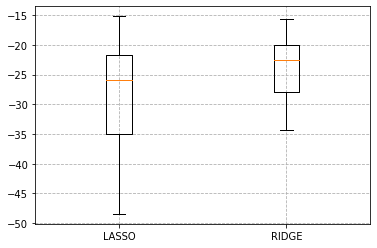

In [12]:

import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle="--")
plt.show()

In [13]:

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [14]:

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X)
X_scaled = std.transform(X)

eta0 = 0.01 
max_iter = 100

In [15]:

from sklearn.model_selection import train_test_split


X_train_dataset, X_test, y_train_dataset, y_test = train_test_split(
            X_scaled,y, test_size=0.2, random_state=42)

sgd_regressor = SGDRegressor(
    eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")

rmse_val_score = []
rmse_train_score = []
model_list = []

X_train, X_val, y_train, y_val = train_test_split(
    X_train_dataset,y_train_dataset, test_size=0.2, random_state=42)
sgd_regressor.fit(X_train,y_train)

# kf = KFold(n_splits=100, shuffle=True)
# for train_index, test_index in kf.split(X_train_dataset):

for i in range(300):

    y_pred = sgd_regressor.predict(X_train)
    y_true = y_train
    rmse_train_score.append(rmse(y_pred, y_true))

    y_pred = sgd_regressor.predict(X_val)
    y_true = y_val
    rmse_val_score.append(rmse(y_pred, y_true))
    model_list.append(sgd_regressor)

    coef = sgd_regressor.coef_.copy()
    intercept = sgd_regressor.intercept_.copy()

    sgd_regressor = SGDRegressor(
        eta0=eta0, max_iter=max_iter, warm_start=True, learning_rate="constant")
    
    sgd_regressor.fit(X_train,y_train, coef_init=coef, intercept_init=intercept)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


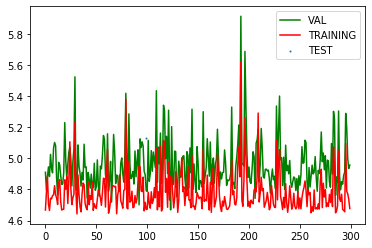

In [16]:

plt.plot(range(len(rmse_val_score)), rmse_val_score,  c="G", label="VAL")
plt.plot(range(len(rmse_train_score)), rmse_train_score,  c="r", label="TRAINING")
plt.scatter(99, rmse(y_test,sgd_regressor.predict(X_test)), s=1, label="TEST")
plt.legend()
plt.show()

In [17]:
np.argsort(rmse_val_score)
# 123번째가 가장 작은 것

array([123,  92,  65, 206,  41, 129,  53, 285,  12,  81, 258, 221, 248,
       148,  73, 100,  62, 267,  72,  99, 246,  49, 138,   1, 290,  30,
        31, 235, 151, 145, 186, 226,  44, 276,  47, 141, 242, 280, 154,
       260,  50, 171,  35,  26, 233,  52, 178, 250, 125,  16, 163,  46,
       292,  87, 184,  17,  69, 202, 156, 130, 114, 166, 126, 287, 110,
       185, 241,  77, 147, 210, 201, 153, 257, 279, 291, 243, 102,  60,
       180, 152,  63,  37, 179, 224,  43, 181, 173, 220,  84,  11, 247,
        21, 245, 215, 137, 222, 199, 133, 244, 286,  89,   2, 266, 214,
         4,  85, 289, 225, 261, 161,  71, 191, 157, 249,  15, 293, 251,
        70,  98,  59,  45, 282, 263, 239, 103,  76, 120, 269, 182,  34,
         7, 143, 174,  18, 122,  42,  36, 294, 175,   0, 264, 132, 172,
        86,  97, 105, 218, 237,  66, 268, 219, 274, 203, 216, 217, 223,
        55, 298,   6, 108, 259,  39, 115, 158, 200,   3,  40, 187,  54,
        33, 195, 238, 228, 164, 262, 299,  14, 211,  83, 167, 19

In [18]:
rmse(y_test,sgd_regressor.predict(X_test))

5.131070825366437

In [21]:
rmse(y_test,model_list[123].predict(X_test))

4.9689732723957905

In [22]:
model_list[0].coef_

array([-1.29394456e+00,  6.42729291e-01,  7.30442183e-02,  5.39901701e-01,
       -2.00407274e+00,  3.77854382e+00, -1.10826543e-03, -3.30695269e+00,
        1.86933249e+00, -1.07161231e+00, -2.11340026e+00,  1.04407693e+00,
       -3.53823114e+00])